Exract data on handball courts from NYC Open Data 

Source:
1. DPR_Handball_001.json: https://data.cityofnewyork.us/Recreation/Directory-of-Handball-Courts/aviq-jvfs/about_data

### Data Dictionary 

Prop_ID: A unique identifier for the property. The first character is a abbreviation of the borough,
followed by a 3 digit number. Anything after the first 4 characters represents a subproperty.
Boroughs:
X - Bronx
B - Brooklyn
M - Manhattan
Q - Queens
R - Staten Island
See http://www.nycgovparks.org/bigapps/DPR_Parks_001.xml or http://www.nycgovparks.org/bigapps/DPR_Parks_001.json


Name: Name of the property


Location: Text location


Num_of_Courts: Number of courts in the property

In [15]:
import pandas as pd

import numpy as np
import json
import os
import matplotlib.pyplot as plt
import folium

In [16]:
current_directory = os.getcwd()
data_dir = os.path.join(os.path.dirname(current_directory), 'Data')
data_dir

'/Users/irsaashraf/Desktop/Projects/Cafe Data/NYC-Cafes/Data'

In [17]:
hb_filename = "DPR_Handball_001.json"
hb_data = pd.read_json(os.path.join(data_dir, hb_filename))
hb_data.head(10)

,Prop_ID,Name,Location,Num_of_Courts,lat,lon
0,X174,174 St. Playground,E. 174 and Bronx River Avenue,4.0,NaN,NaN
1,X126,Abigail Playground,"Tinton Avenue, E. 156 St.",2.0,NaN,NaN
2,X169,Agnes Haywood Playground,"E. 215 St., Barnes Ave., E. 216 St.",2.0,40.8804,-73.8621
3,X172,Allerton Playground,"Allerton, Bouck, Throop Aves. & Stedman Place",4.0,40.8659,-73.8506
4,X219,Arcilla Playground,"Clay, Park, and Teller Aves., E. 164 St.",4.0,40.8270,-73.9148
5,X150J,Bailey Playground,Bailey Avenue & 234 St.,6.0,40.8818,-73.9002
6,X166,Behagen Playground,"165-166 Sts., Union Avenue",2.0,40.8258,-73.9008
7,X108,Belmont Playground,"E. 181 & E. 182 Sts., Crotona & Belmont Aves.",6.0,40.8504,-73.8874
8,X002,Brady Playground,Bronxdale Blvd. & Bronx Park East,4.0,40.8519,-73.8694
9,X183,Bruckner Playground,Phillips & Cross Bronx Expressway,2.0,40.8267,-73.8290


In [18]:
hb_data.shape

(547, 6)

### Number of courts per borough

In [19]:
borough_id_map = {"X": "Bronx", "B": "Brooklyn", "M": "Manhattan", "Q": "Queens", "R":"Staten Island"}

hb_data["Borough"] = hb_data['Prop_ID'].str[0].map(borough_id_map)

# Change number of courts to int
hb_data['Num_of_Courts'].replace([np.inf, -np.inf], np.nan, inplace = True)
hb_data['Num_of_Courts'] = hb_data['Num_of_Courts'].astype('Int64')

hb_data.head()

/var/folders/7x/ln_3wt0j7v9dkyhj_b2t6v480000gn/T/ipykernel_94280/4120862824.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hb_data['Num_of_Courts'].replace([np.inf, -np.inf], np.nan, inplace = True)


,Prop_ID,Name,Location,Num_of_Courts,lat,lon,Borough
0,X174,174 St. Playground,E. 174 and Bronx River Avenue,4,NaN,NaN,Bronx
1,X126,Abigail Playground,"Tinton Avenue, E. 156 St.",2,NaN,NaN,Bronx
2,X169,Agnes Haywood Playground,"E. 215 St., Barnes Ave., E. 216 St.",2,40.8804,-73.8621,Bronx
3,X172,Allerton Playground,"Allerton, Bouck, Throop Aves. & Stedman Place",4,40.8659,-73.8506,Bronx
4,X219,Arcilla Playground,"Clay, Park, and Teller Aves., E. 164 St.",4,40.8270,-73.9148,Bronx


In [20]:
hb_data.dropna(inplace=True)

In [21]:
# save cleaned file 
# hb_data.to_csv(os.path.join(data_dir, "handball_courts_clean.csv"), index = False)

In [22]:
hb_data.shape

(435, 7)

In [23]:
courts_by_bor = hb_data.groupby("Borough")["Num_of_Courts"].sum().sort_values(ascending = False).reset_index()
courts_by_bor

,Borough,Num_of_Courts
0,Brooklyn,568
1,Queens,465
2,Bronx,269
3,Manhattan,197
4,Staten Island,42


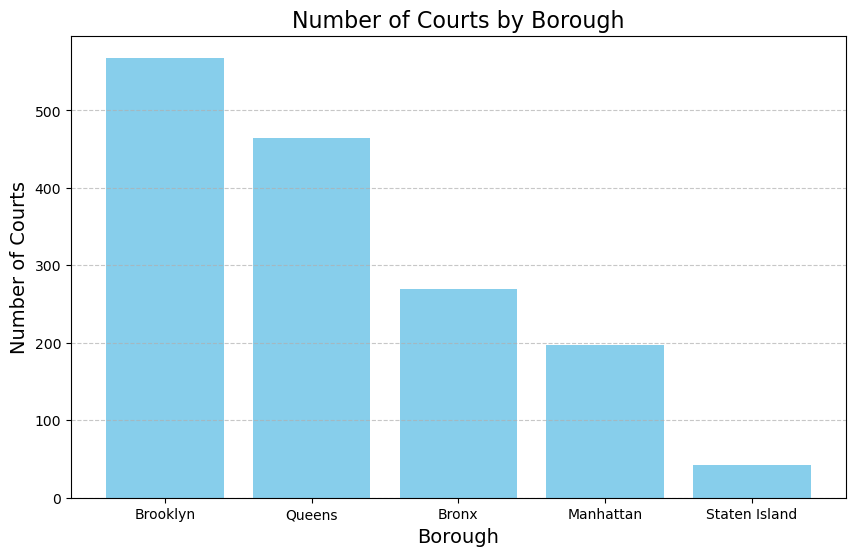

In [24]:
# Plotting the grouped data
plt.figure(figsize=(10, 6))
plt.bar(courts_by_bor['Borough'], courts_by_bor['Num_of_Courts'], color='skyblue')

# Adding title and labels
plt.title('Number of Courts by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Courts', fontsize=14)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Create map of nyc using folium

In [25]:
# Create function to create map 

def create_map(center_coords, df, lat_colname, lon_colname):
    return 

In [26]:
# Initialize the map at the center of NYC

# Source: https://dev.to/manifoldmindaway/plotting-the-trees-of-nyc-with-folium-4ffo

center_lat = 40.7128
center_lon = -74.0060
nyc_map = folium.Map(location=[center_lat, center_lon], zoom_start=12.5)
nyc_map

In [27]:
# source: https://python-graph-gallery.com/288-map-background-with-folium/

# Add markers to map 
for idx, row in hb_data.iterrows():
    popup_text = f"""
    <strong>Court Name:</strong> {row['Name']}<br>
    <strong>Address:</strong> {row['Location']}<br>
    <strong>No. of Courts:</strong> {row['Num_of_Courts']}<br>
    """
    folium.Marker(location=[row['lat'], row['lon']], popup=folium.Popup(popup_text, max_width=300)).add_to(nyc_map)

nyc_map

### Calculate distance of nearest court from me

In [28]:
from geopy.distance import geodesic

# Your current location (latitude, longitude)
# Using address of nearest subway station to me (The Hugh)
my_location = (40.7577047, -73.970668)  # Example: somewhere in NYC

# Calculate distances
hb_data['distance'] = hb_data.apply(lambda row: geodesic(my_location, 
                                                   (row['lat'], row['lon'])).miles, axis=1)

# Sort by distance and display the nearest courts
nearest_courts = hb_data.sort_values(by='distance').head(5)
print(nearest_courts[['Name', 'lat', 'lon', 'distance']])

# Add nearest courts to the map with a different color marker
for index, row in nearest_courts.iterrows():
    folium.Marker([row['lat'], row['lon']],
                  popup=row['Name'],
                  icon=folium.Icon(color='green')).add_to(nyc_map)

# Display map
nyc_map

                           Name      lat      lon  distance
272     24 Sycamores Playground  40.7593 -73.9586  0.642700
327     Robert Moses Playground  40.7478 -73.9689  0.689719
331  St. Catherine's Playground  40.7654 -73.9591  0.806433
334           St. Vartan's Park  40.7457 -73.9749  0.857608
297                   Gutenberg  40.7633 -73.9899  1.080406
